# **`1. Import libraries and Dataset`**

In [1]:
from src.logger import logging
logging.info('PROJECT FILE 2 STARTS RUNNING!')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  

import pickle

import warnings
warnings.filterwarnings('ignore')



In [3]:
logging.info('LIBRARIES IMPORTED')

In [4]:
df = pd.read_csv('D:/ccdp/notebook/Credit_Card_2.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
logging.info('DATA IMPORTED AND EXTRACTED TO DATAFRAME!')

# **`2. Feature Engineering`**

In [6]:
logging.info('FEATURE ENGINEERING STARTS!')

## **`2.1 Handling the imbalance of data using SMOTE`**

In [7]:
logging.info('HANDLING IMBALANCED DATA STARTS!')

In [8]:
# Initialise SMOTE object
smote = SMOTE()

In [9]:
# Separate independent and dependent variables
X = df.iloc[:,:-1]
y = df['default']

In [10]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [11]:
# Combine balanced X and y
df_final = pd.DataFrame(x_smote, columns=df.columns[:-1])
df_final['default'] = y_smote

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<Axes: xlabel='default', ylabel='count'>

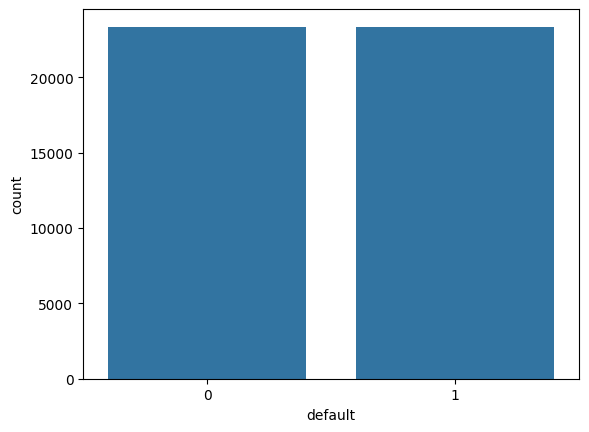

In [12]:
#plot to check if the dataframe is balanced after smote
sns.countplot(x='default', data = df_final)

In [13]:
df_final.default.value_counts()

default
1    23364
0    23364
Name: count, dtype: int64

In [14]:
logging.info('HANDLING IMBALANCED DATA ENDS!')

Done!

Next, we need to perform One Hot Encoding on the categorical variables.
But before that, we need to work on the following points:
- Change column names PAY_1 to PAY_6 as PAY_SEPT, PAY_AUG, PAY_JULY, PAY_JUNE, PAY_MAY AND PAY_SEPT.
- Change column names PAY_AMT1 to PAY_AMT6 to PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JULY, PAY_AMT_JUNE, PAY_AMT_MAY AND PAY_AMT_SEPT.
- Change column names BILL_AMT1 to BILL_AMT6 to BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JULY, BILL_AMT_JUNE, BILL_AMT_MAY AND BILL_AMT_SEPT.
- Change values in SEX: 
  - 1-Male and 
  - 2-Female
- Change values in EDUCATION : 
  - 1 : Graguation
  - 2 : University
  - 3 : High School
  - 0,4,5,6 : Others
- Change values in Marriage:
  - 1 : Married
  - 2 : Single
  - 0,3 : Others


In [15]:
# Replace values in SEX, MARRIAGE and EDUCATION variables
df_final['SEX'] = df_final['SEX'].replace({1:'Male', 2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})
df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [16]:
# Change column names PAY_1 to PAY_6
df_final.rename(columns={'PAY_1':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_final.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_final.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_final.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [17]:
df_final.shape

(46728, 25)

## **`2.2 Encoding categorical variables`**

In [18]:
logging.info('ENCODING CATEGORICAL VARIABLE STARTS!')

In [19]:
# Encoding categorical variables
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE'])

df_final.head()

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,...,default,SEX_Female,SEX_Male,EDUCATION_Graduation,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,1,True,False,False,False,False,True,True,False,False
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1,True,False,False,False,False,True,False,False,True
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,True,False,False,False,False,True,False,False,True
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,True,False,False,False,False,True,True,False,False
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,False,True,False,False,False,True,True,False,False


In [20]:
# We drop the column ID as it is of not use for our modeling
df_final.drop('ID',axis = 1, inplace = True)

In [21]:
df_final.shape

(46728, 30)

In [22]:
logging.info('ENCODING CATEGORICAL VARIABLE ENDS!')

# **`3. Model-1 : Basic Model with all features`**

In [23]:
logging.info('MODEL-1 RUNNING!')

In [24]:
# Rearrange columns in dataframe before submitting for modeling
df_final = df_final[['SEX_Male', 'SEX_Female', 
                     'EDUCATION_High_School', 'EDUCATION_Graduation', 'EDUCATION_University', 'EDUCATION_Others',
                     'MARRIAGE_Single', 'MARRIAGE_Married', 'MARRIAGE_Others',
                     'AGE', 'LIMIT_BAL', 
                     'PAY_APRIL',
                     'PAY_MAY',
                     'PAY_JUNE',
                     'PAY_JULY',
                     'PAY_AUG',
                     'PAY_SEPT',
                     'BILL_AMT_APRIL', 'BILL_AMT_MAY', 'BILL_AMT_JUNE', 'BILL_AMT_JULY', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
                     'PAY_AMT_APRIL', 'PAY_AMT_MAY', 'PAY_AMT_JUNE', 'PAY_AMT_JULY', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 
                     'default']]

In [25]:
#df_model = df_final.sample(frac=0.10, random_state=100)
# Create a copy of df_final
df_model = df_final.copy()
df_model.head()

,SEX_Male,SEX_Female,EDUCATION_High_School,EDUCATION_Graduation,EDUCATION_University,EDUCATION_Others,MARRIAGE_Single,MARRIAGE_Married,MARRIAGE_Others,AGE,...,BILL_AMT_JULY,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APRIL,PAY_AMT_MAY,PAY_AMT_JUNE,PAY_AMT_JULY,PAY_AMT_AUG,PAY_AMT_SEPT,default
0,False,True,False,False,True,False,False,True,False,24,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,False,True,False,False,True,False,True,False,False,26,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,False,True,False,False,True,False,True,False,False,34,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,False,True,False,False,True,False,False,True,False,37,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,True,False,False,False,True,False,False,True,False,57,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [26]:
# Train Test split
X = df_model.drop(columns=['default'], axis=1)
y = df_model['default']

#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
logging.info('TRAIN TEST SPLIT OCCURED!')

In [28]:
# Initialise RandomForestClassifier object
rf_clf = RandomForestClassifier(random_state=6)
rf_clf.fit(X_train,y_train)

logging.info('MODEL-1 FITTED ON TRAINING DATA!')

In [29]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

logging.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

Here, we are going to consider **Recall Score** as our evaluation metric, since we are more considered about predicting maximum number of actual defaulters.

In [30]:
# Calculate recall scores on train and test data
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logging.info('EVALUATION METRICS CALCULATED')

In [31]:
# Print the recall scores
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9991439926627943
The recall on test data is  0.8403923316986179


In [32]:
logging.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

# **`4. Feature Selection`**

In [33]:
logging.info('FEATURE SELECTION STARTS!')

In [34]:
# Find feature importance scores
rf_clf.feature_importances_

array([0.01533039, 0.02240231, 0.01066086, 0.00944899, 0.00729448,
       0.00136376, 0.01469108, 0.01922291, 0.00096194, 0.05207366,
       0.05523771, 0.02024593, 0.02595996, 0.03127367, 0.02972041,
       0.06436985, 0.07097596, 0.0424261 , 0.04183688, 0.04295495,
       0.04407787, 0.04567866, 0.0557117 , 0.04306487, 0.04104852,
       0.04270044, 0.04438173, 0.04925864, 0.0556258 ])

In [35]:
# Arrange features according to their scores in descending order
feature_scores = pd.Series(rf_clf.feature_importances_,
                           index=df_model.drop('default', axis=1).columns).sort_values(ascending=False)                         

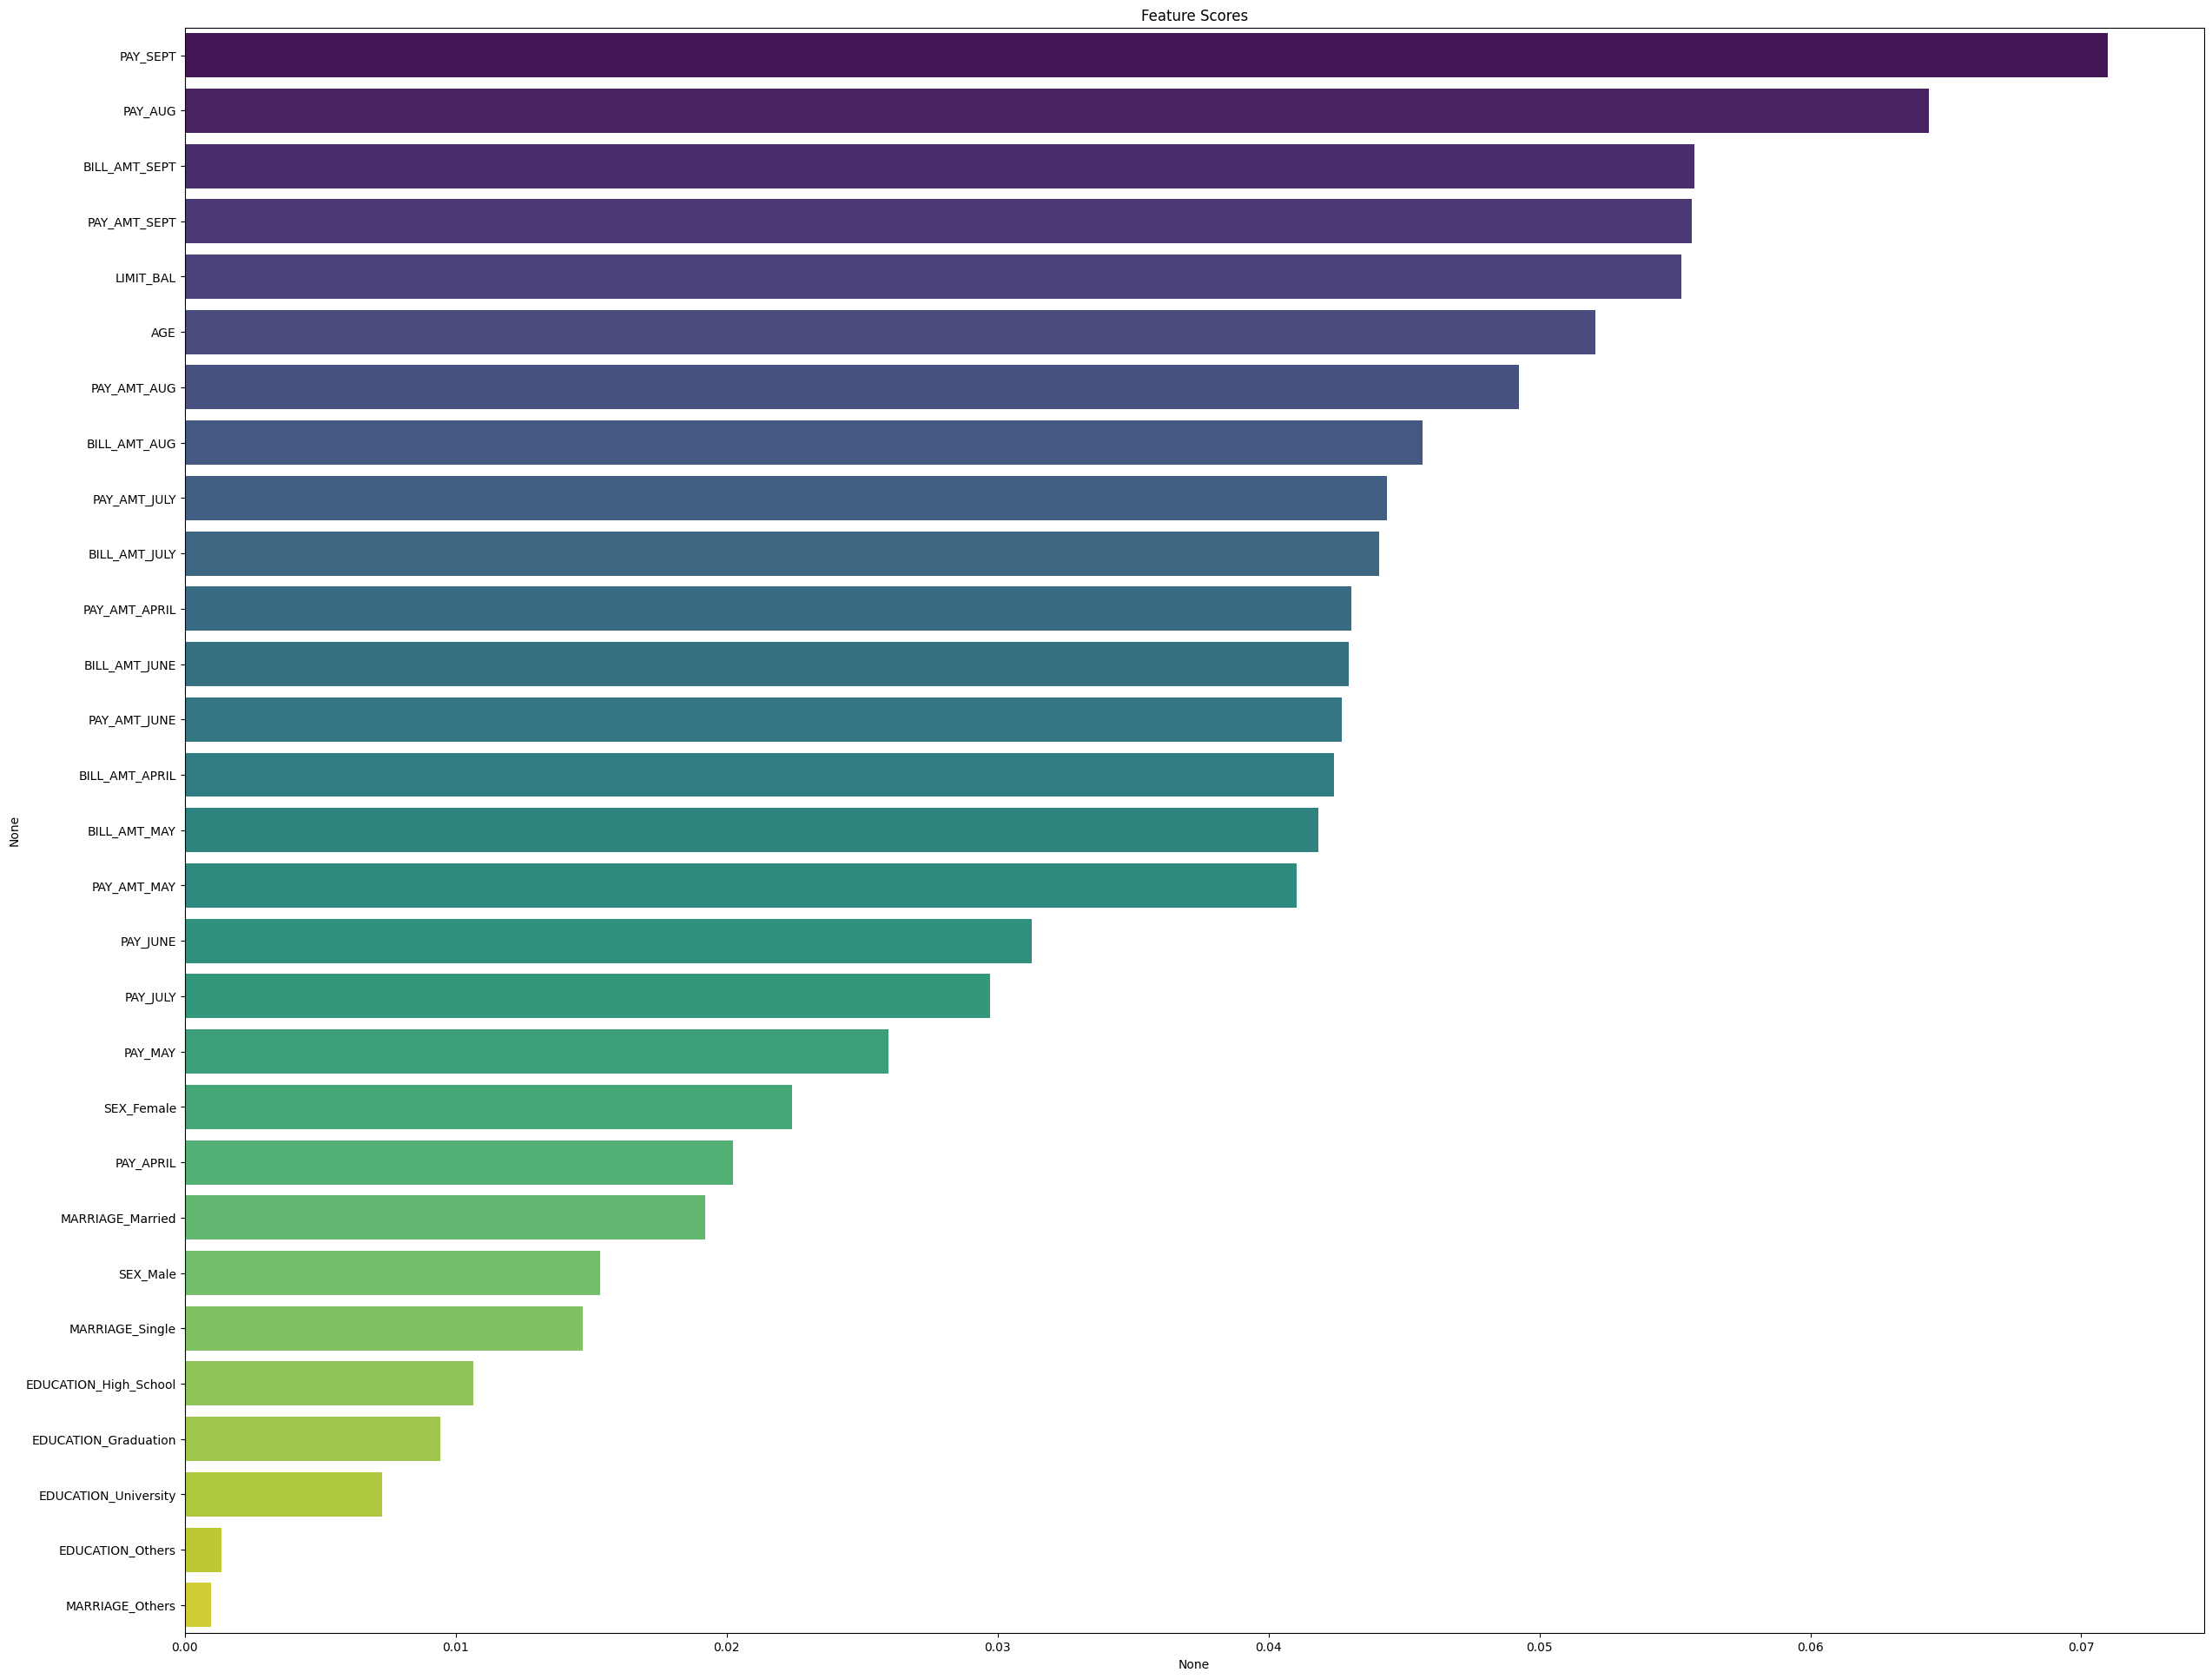

In [36]:
# Visualizing the scores
f, ax = plt.subplots(figsize=(30,24))
ax = sns.barplot(x=feature_scores,
                    y=feature_scores.index, palette='viridis')  
ax.set_title('Feature Scores')
ax.set_yticklabels(feature_scores.index)
plt.show()


In [37]:
logging.info('FEATURE SELECTION ENDS!')

# **`5. Model-2 : With important features`**

In [38]:
logging.info('MODEL-2 RUNNING!')

In [39]:
# Create a dataframe from df_model using the top 15 features based on importance score
df_imp = df_model[feature_scores.index[:15]]
df_imp['default'] = df_model['default']
df_imp.head()

# Separate independent and dependent variables
X = df_imp.drop('default', axis=1)
y = df_imp['default']

In [40]:
#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
logging.info('TRAIN TEST SPLIT OCCURED!')

In [43]:
# Initiate RandomForestClassifier object
rf_clf_2 = RandomForestClassifier(random_state=6)
rf_clf_2.fit(X_train,y_train)

logging.info('MODEL-2 FITTED ON TRAINING DATA!')

In [44]:
# Get the predicted classes
train_class_preds = rf_clf_2.predict(X_train)
test_class_preds = rf_clf_2.predict(X_test)

logging.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

In [45]:
# Calculate recall scores
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logging.info('EVALUATION METRICS CALCULATED')

In [46]:
# Display recall scores
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9978054916234009
The recall on test data is  0.8666516245487365


**OBSERVATION :** Recall score on test data has improved from the previous model.

Note : Scores might not improve by huge amounts every time we modify the model, but by few points, which does infact, reduce the loss for the organization by considerable amount monetarily.

In [47]:
logging.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

# **`6. Feature Engineering : Create feature BILL_AMT_AVG`**

In this stage, we create or engineer a new feature BILL_AMT_AVG, by calculating the average of all the bill amounts.

In [48]:
logging.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, STARTS!')

In [49]:
# Create the new feature in the original dataframe
df_model['BILL_AMT_AVG'] = (df_model['BILL_AMT_APRIL'] + df_model['BILL_AMT_MAY'] + df_model['BILL_AMT_JUNE'] + df_model['BILL_AMT_JULY'] + df_model['BILL_AMT_AUG'] + df_model['BILL_AMT_SEPT'])/6

In [50]:
# Add the new feature to df_imp
df_imp['BILL_AMT_AVG'] = df_model['BILL_AMT_AVG']
df_imp.head()

,PAY_SEPT,PAY_AUG,BILL_AMT_SEPT,PAY_AMT_SEPT,LIMIT_BAL,AGE,PAY_AMT_AUG,BILL_AMT_AUG,PAY_AMT_JULY,BILL_AMT_JULY,PAY_AMT_APRIL,BILL_AMT_JUNE,PAY_AMT_JUNE,BILL_AMT_APRIL,BILL_AMT_MAY,default,BILL_AMT_AVG
0,2,2,3913.0,0.0,20000.0,24,689.0,3102.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1,1284.000000
1,-1,2,2682.0,0.0,120000.0,26,1000.0,1725.0,1000.0,2682.0,2000.0,3272.0,1000.0,3261.0,3455.0,1,2846.166667
2,0,0,29239.0,1518.0,90000.0,34,1500.0,14027.0,1000.0,13559.0,5000.0,14331.0,1000.0,15549.0,14948.0,0,16942.166667
3,0,0,46990.0,2000.0,50000.0,37,2019.0,48233.0,1200.0,49291.0,1000.0,28314.0,1100.0,29547.0,28959.0,0,38555.666667
4,-1,0,8617.0,2000.0,50000.0,57,36681.0,5670.0,10000.0,35835.0,679.0,20940.0,9000.0,19131.0,19146.0,0,18223.166667


In [51]:
logging.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, ENDS!')

# **`7. Model-3 : With new feature BILL_AMT_AVG`**

In [52]:
logging.info('MODEL-3 RUNNING!')

In [53]:
X = df_imp.drop('default', axis=1)
y = df_imp['default']

#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
logging.info('TRAIN TEST SPLIT OCCURED!')

In [56]:
rf_clf_3 = RandomForestClassifier(random_state=6)
rf_clf_3.fit(X_train,y_train)

logging.info('MODEL FITTED ON TRAINING DATA!')

In [57]:
# Get the predicted classes
train_class_preds = rf_clf_3.predict(X_train)
test_class_preds = rf_clf_3.predict(X_test)

logging.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

In [58]:
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logging.info('EVALUATION METRICS CALCULATED')

In [59]:
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9979654120040692
The recall on test data is  0.8645175834084761


**OBSERVATION :** Recall score has again improved slightly from te previous model. Threfore we shall keep the newly created feature as one of the independent variables.

In [60]:
logging.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

In [61]:
X[:1]

array([[ 1.63987289,  1.62669245, -0.62932475, -0.33608063, -1.06288781,
        -1.29574682, -0.21880586, -0.63643883, -0.28526382, -0.66148657,
        -0.28454569, -0.66408099, -0.30244679, -0.6485904 , -0.65442828,
        -0.67484293]])

# **`8. Feature Engineering : Create feature BILL_PAY_VALUE`**

In [62]:
logging.info('FEATURE ENGINEERING : FEATURE CREATION BILL_PAY_VALUE, STARTS!')

In [63]:
df_model['BILL_PAY_VALUE'] = ((df_model['PAY_AMT_SEPT']-df_model['BILL_AMT_AUG']) +
                       (df_model['PAY_AMT_AUG']-df_model['BILL_AMT_JULY']) +
                       (df_model['PAY_AMT_JULY']-df_model['BILL_AMT_JUNE']) +
                       (df_model['PAY_AMT_JUNE']-df_model['BILL_AMT_MAY']) +
                       (df_model['PAY_AMT_MAY']-df_model['BILL_AMT_APRIL']))/5

In [64]:
df_imp['BILL_PAY_VALUE'] = df_model['BILL_PAY_VALUE']
df_imp.head()

,PAY_SEPT,PAY_AUG,BILL_AMT_SEPT,PAY_AMT_SEPT,LIMIT_BAL,AGE,PAY_AMT_AUG,BILL_AMT_AUG,PAY_AMT_JULY,BILL_AMT_JULY,PAY_AMT_APRIL,BILL_AMT_JUNE,PAY_AMT_JUNE,BILL_AMT_APRIL,BILL_AMT_MAY,default,BILL_AMT_AVG,BILL_PAY_VALUE
0,2,2,3913.0,0.0,20000.0,24,689.0,3102.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,1,1284.000000,-620.4
1,-1,2,2682.0,0.0,120000.0,26,1000.0,1725.0,1000.0,2682.0,2000.0,3272.0,1000.0,3261.0,3455.0,1,2846.166667,-2279.0
2,0,0,29239.0,1518.0,90000.0,34,1500.0,14027.0,1000.0,13559.0,5000.0,14331.0,1000.0,15549.0,14948.0,0,16942.166667,-13279.2
3,0,0,46990.0,2000.0,50000.0,37,2019.0,48233.0,1200.0,49291.0,1000.0,28314.0,1100.0,29547.0,28959.0,0,38555.666667,-35391.2
4,-1,0,8617.0,2000.0,50000.0,57,36681.0,5670.0,10000.0,35835.0,679.0,20940.0,9000.0,19131.0,19146.0,0,18223.166667,-8470.4


In [65]:
logging.info('FEATURE ENGINEERING : FEATURE CREATION BILL_AMT_AVG, ENDS!')

# **`9. Model-4 : With new feature BILL_PAY_VALUE`**

In [66]:
logging.info('MODEL-4 RUNNING!')

In [67]:
#df_imp.drop('BILL_AMT_AVG', axis=1, inplace=True)

In [68]:
X = df_imp.drop('default', axis=1)
y = df_imp['default']

In [69]:
#standardise the x value by using standardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [70]:
# Split the data to train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
rf_clf_4 = RandomForestClassifier(random_state=6)
rf_clf_4.fit(X_train,y_train)

logging.info('MODEL-4 FITTED ON TRAINING DATA!')

In [72]:
# Get the predicted classes
train_class_preds = rf_clf_4.predict(X_train)
test_class_preds = rf_clf_4.predict(X_test)

logging.info('PREDICTED ON BOTH TRAIN AND TEST DATA')

In [73]:
# Recall scores calculated on train and test data
train_recall_score_rf = recall_score(train_class_preds,y_train)
test_recall_score_rf = recall_score(test_class_preds,y_test)

logging.info('EVALUATION METRICS CALCULATED')

In [74]:
print("The recall on train data is ", train_recall_score_rf)
print("The recall on test data is ", test_recall_score_rf)

The recall on train data is  0.9978587870028371
The recall on test data is  0.8635034854958399


**OBSERVATION :** Recall score has decresed by a couple of points from the previous model. We decide to remove the feature from the independent variable set.

In [75]:
df_imp.drop('BILL_PAY_VALUE', axis=1, inplace=True)

In [76]:
logging.info(f'TRAIN RECALL SCORE={train_recall_score_rf} \n TEST RECALL SCORE={test_recall_score_rf}')

# **`10. Save the Model`**

In [77]:
logging.info('SAVING THE MODEL....')

Compress the model.pkl, since it is difficult to upload a file more than 25mb in Github (for deployment).


Model: Random Forest
Recall: 0.8050
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      4664
           1       0.86      0.80      0.83      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346

Confusion Matrix:
[[4060  604]
 [ 913 3769]]

Model: XGBoost
Recall: 0.7456
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      4664
           1       0.83      0.75      0.78      4682

    accuracy                           0.79      9346
   macro avg       0.80      0.79      0.79      9346
weighted avg       0.80      0.79      0.79      9346

Confusion Matrix:
[[3926  738]
 [1191 3491]]

Model: Logistic Regression
Recall: 0.6689
Classification Report:
              precision    recall  f1-score   support

           0       0.

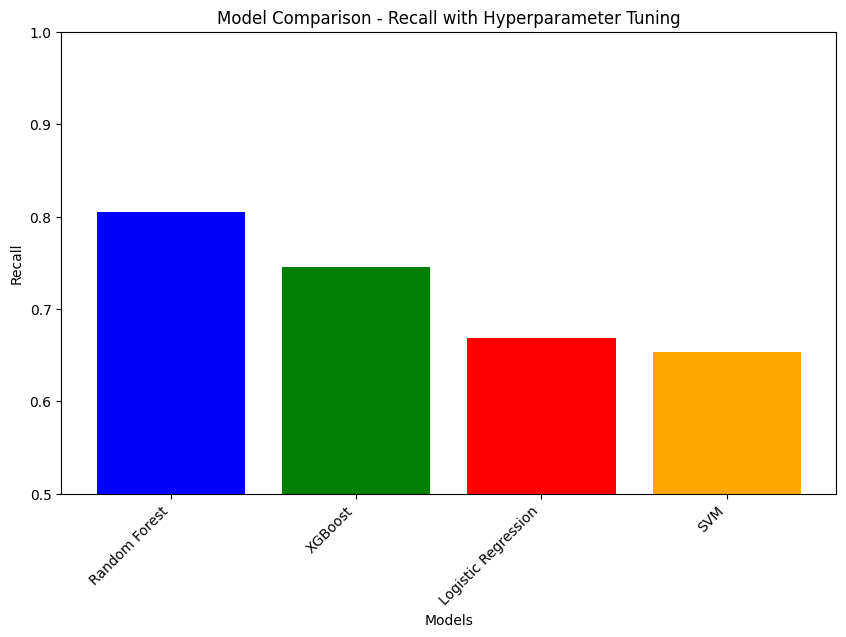

In [78]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from joblib import parallel_backend

from sklearn.metrics import recall_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

param_grid_logistic = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}


# Create the models with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)


# Perform Randomized Search with cross-validation to find the best hyperparameters for each model
random_search_rf = RandomizedSearchCV(rf_model, param_grid_rf, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_logistic = RandomizedSearchCV(logistic_model, param_grid_logistic, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_svm = RandomizedSearchCV(svm_model, param_grid_svm, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the models with Randomized Search
with parallel_backend('threading'):
    random_search_rf.fit(X_train, y_train)
    random_search_xgb.fit(X_train, y_train)
    random_search_logistic.fit(X_train, y_train)
    random_search_svm.fit(X_train, y_train)
    

# Get the best hyperparameters and best models
best_params_rf = random_search_rf.best_params_
best_rf_model = random_search_rf.best_estimator_

best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

best_params_logistic = random_search_logistic.best_params_
best_logistic_model = random_search_logistic.best_estimator_

best_params_svm = random_search_svm.best_params_
best_svm_model = random_search_svm.best_estimator_

# Evaluate the best models
best_models = {
    "Random Forest": best_rf_model,
    "XGBoost": best_xgb_model,
    "Logistic Regression": best_logistic_model,
    "SVM": best_svm_model,
}

# Calculate recalls
model_recalls = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    model_recalls[model_name] = recall

# Print the best hyperparameters for each model
# (Include your existing print statements for best hyperparameters here)

# Evaluate the best models
for model_name, model in best_models.items():
    print(f"\nModel: {model_name}")
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)  # Changed accuracy_score to recall_score
    print(f"Recall: {recall:.4f}")  # Changed from Accuracy to Recall

    # Additional Evaluation Metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Plotting the bar graph
plt.figure(figsize=(10, 6))

# Add color to the bars
colors = ['blue', 'green', 'red','orange'] 

plt.bar(model_recalls.keys(), model_recalls.values(), color=colors)

plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Comparison - Recall with Hyperparameter Tuning')
plt.ylim(0.5, 1.0)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45, ha='right')
plt.show()

We got the highest recall score using model rf with 0.867. Therefore, we shall save this model for production.

In [79]:
pickle.dump(model, open('model_1.pkl', 'wb'))

logging.info('MODEL SAVED!')

In [80]:
#pip install bz2file

In [81]:
import bz2file as bz2 

In [82]:
def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

In [83]:
compressed_pickle('model_1', model)

In [84]:
logging.info('PROJECT RUNNING ENDS!')